In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
real= '/content/drive/My Drive/ml_data_/Rprocessed'
fake= '/content/drive/My Drive/ml_data_/Fproccessed'


In [3]:
import keras
import sklearn
from sklearn.model_selection import train_test_split
sklearn.model_selection.train_test_split
from keras import datasets, layers, models
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [4]:
def load_images_from_folder(folder_path, target_size=(64, 64)):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load real and fake images
real_images = load_images_from_folder(real)
fake_images = load_images_from_folder(fake)

# Create labels (0 for real, 1 for fake)
real_labels = [0] * len(real_images)
fake_labels = [1] * len(fake_images)

# Combine real and fake data
all_images = real_images + fake_images
all_labels = real_labels + fake_labels

# Convert to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42  # Adjust test_size as needed
)

print("Data split complete!")
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Data split complete!
Train images shape: (972, 64, 64, 3)
Test images shape: (244, 64, 64, 3)


In [5]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255

# One hot encoding the target class (labels)
num_classes = 2
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [6]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(64,64,3))) #((3*3*3)+1)*128
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu')) #((3*3*128)+1)+256
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='sigmoid'))    # num_classes = 2

# Checking the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,753,602 (6.69 MB)

 Trainable params: 1,753,602 (6.69 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=100, epochs=6,
                    validation_data=(test_images, test_labels))

Epoch 1/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 206s 20s/step - accuracy: 0.5141 - loss: 0.7160 - val_accuracy: 0.4713 - val_loss: 0.6932
Epoch 2/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 194s 20s/step - accuracy: 0.5154 - loss: 0.6928 - val_accuracy: 0.5492 - val_loss: 0.6927
Epoch 3/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 202s 20s/step - accuracy: 0.5322 - loss: 0.6928 - val_accuracy: 0.5902 - val_loss: 0.6924
Epoch 4/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 194s 20s/step - accuracy: 0.5399 - loss: 0.6922 - val_accuracy: 0.4549 - val_loss: 0.7012
Epoch 5/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 203s 20s/step - accuracy: 0.4943 - loss: 0.6990 - val_accuracy: 0.4918 - val_loss: 0.6908
Epoch 6/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 210s 20s/step - accuracy: 0.5072 - loss: 0.6838 - val_accuracy: 0.6025 - val_loss: 0.6681


Text(0.5, 1.0, 'Loss Curves')

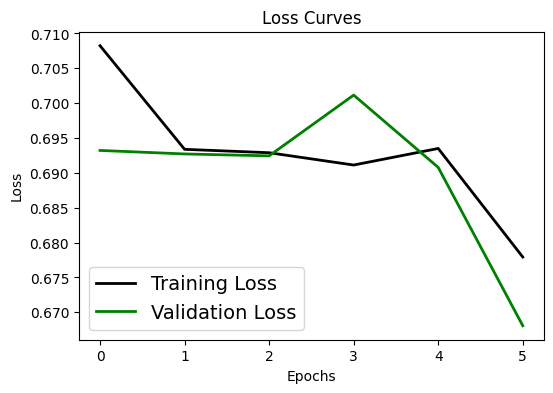

In [39]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

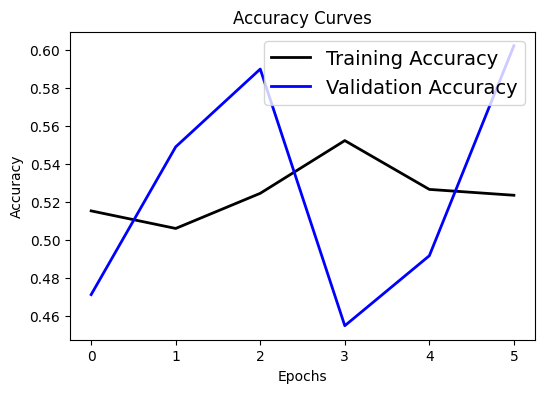

In [40]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64,64, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
model2 = Sequential()
model2.add(base_model)
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model2.add(layers.Dense(56,activation='relu'))
model.add(layers.Dropout(0.2))
model2.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model2.add(layers.Dense(32,activation='relu'))
model2.add(layers.Dense(num_classes, activation='sigmoid'))    # num_classes = 2

# Checking the model summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 56)                  │           7,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           3,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,989,978 (57.18 MB)

 Trainable params: 275,290 (1.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
model2.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model2.fit(train_images, train_labels, batch_size=50, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.6338 - loss: 0.6446 - val_accuracy: 0.8238 - val_loss: 0.4121
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.8410 - loss: 0.3862 - val_accuracy: 0.8443 - val_loss: 0.3456
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8793 - loss: 0.2869 - val_accuracy: 0.9016 - val_loss: 0.2912
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.9329 - loss: 0.1812 - val_accuracy: 0.9303 - val_loss: 0.2646
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9650 - loss: 0.1236 - val_accuracy: 0.9180 - val_loss: 0.3254
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.9605 - loss: 0.1150 - val_accuracy: 0.8361 - val_loss: 0.4482
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9633 - loss: 0.0879 - val_accuracy: 0.9221 - val_loss: 0.3007
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.9863 - loss: 0.0531 - val_accuracy: 0.9016 - val_loss:

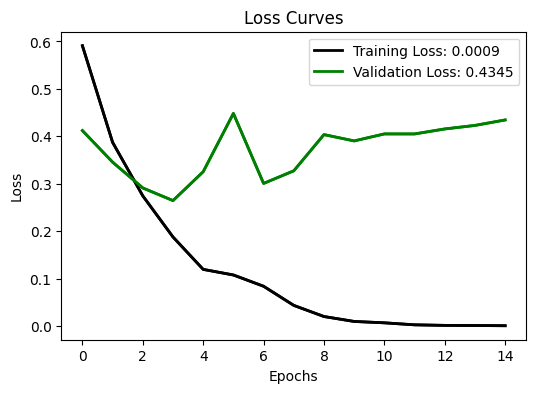

In [12]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
plt.plot(history.history['loss'], 'black', linewidth=2.0, label=f"Training Loss: {history.history['loss'][-1]:.4f}")
plt.plot(history.history['val_loss'], 'green', linewidth=2.0, label=f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
plt.legend()

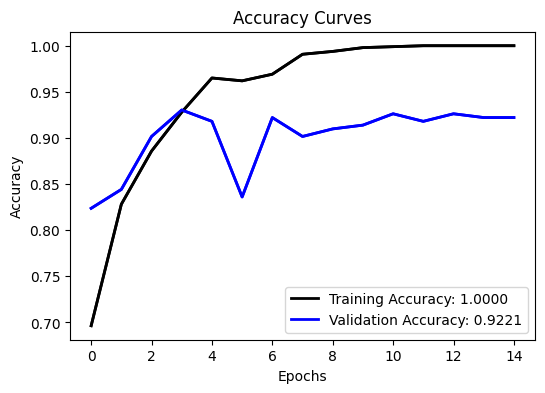

In [13]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)
plt.plot(history.history['accuracy'], 'black', linewidth=2.0, label=f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0, label=f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
plt.legend()